In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from bayes_opt import BayesianOptimization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 解决中文乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

In [2]:
data=pd.read_csv('./use_4.csv')
train_data,test_data=train_test_split(data,test_size=0.2, 
                                      random_state=1318
                                      )
feature=train_data.drop(['丙烯选择性','Unnamed: 0'],axis=1)
label=train_data['丙烯选择性']

In [3]:
kfold = KFold(n_splits = 5, random_state = 1314, shuffle = True)

In [4]:
def RFR_cv(n_estimators, min_samples_split, max_depth):
    val = cross_val_score(
        RandomForestRegressor(n_estimators=int(n_estimators),
            min_samples_split=int(min_samples_split),
            max_depth=int(max_depth),
            random_state=1314
        ),
        feature, label, scoring='r2', cv=kfold
    ).mean()
    return val

In [28]:
RFR_opt = BayesianOptimization(
        RFR_cv,
        {'n_estimators': (50, 1000),
        'min_samples_split': (2, 25),
        'max_depth': (2, 15)}
    )

In [29]:
RFR_opt.maximize(n_iter=50)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 1         | 0.4953    | 3.307     | 3.939     | 212.8     |
| 2         | 0.3731    | 2.285     | 5.216     | 478.3     |
| 3         | 0.6292    | 5.584     | 2.314     | 857.5     |
| 4         | 0.5223    | 4.159     | 17.67     | 332.3     |
| 5         | 0.5417    | 11.9      | 22.71     | 413.9     |
| 6         | 0.6736    | 7.279     | 2.472     | 857.6     |
| 7         | 0.6669    | 11.12     | 5.76      | 857.9     |
| 8         | 0.6836    | 11.55     | 2.308     | 851.7     |
| 9         | 0.683     | 10.3      | 2.654     | 866.8     |
| 10        | 0.6847    | 15.0      | 2.0       | 876.9     |
| 11        | 0.5693    | 4.614     | 4.024     | 879.5     |
| 12        | 0.6337    | 15.0      | 10.72     | 871.9     |
| 13        | 0.6636    | 13.13     | 6.425     | 840.2     |
| 14        | 0.5719    | 12.44     | 17.98     | 840.8     |
| 15    

In [5]:
model = RandomForestRegressor(n_estimators=1000,
                              max_depth=16,
                              random_state=1314).fit(X=feature , y=label)
r2_score = cross_val_score(model, feature, label, cv=kfold, scoring='r2').mean()
rmse_score = pow(abs(cross_val_score(model, feature, label, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5)
print('r2:',r2_score)
print('rmse:',rmse_score)

r2: 0.6872393177955403
rmse: 11.929980727674035


In [6]:
test_x = test_data.drop(['丙烯选择性','Unnamed: 0'],axis=1)
test_y = test_data['丙烯选择性']
test_score = model.score(test_x,test_y)
print('测试集得分为：', test_score)

测试集得分为： 0.6180336227437387


In [7]:
# 预测
Y1=model.predict(X=test_data.drop(['丙烯选择性','Unnamed: 0'],axis=1))
Y2=test_data['丙烯选择性']
d={'Y_pred':Y1,
   'Y_True':Y2
   }
pred_show=pd.DataFrame(d)

In [8]:
# 预测2
Y_1=model.predict(X=feature)
Y_2=label
d_1={'Y_pred':Y_1,
   'Y_True':Y_2
   }
pred_show_1=pd.DataFrame(d_1)

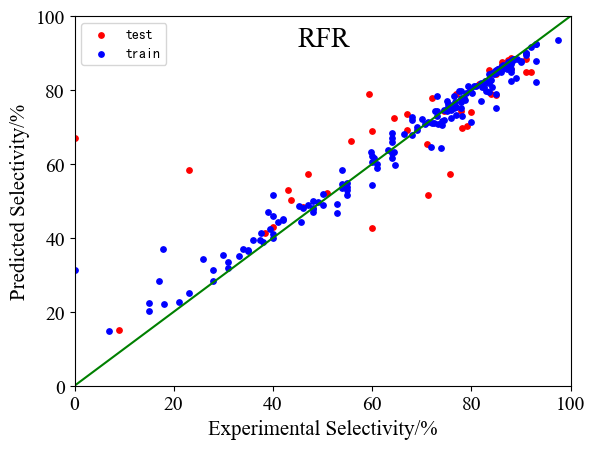

In [53]:
plt.scatter(pred_show.iloc[:,1],pred_show.iloc[:,0],color='r',s=15,label='test')
plt.scatter(pred_show_1.iloc[:,1],pred_show_1.iloc[:,0],color='b',s=15,label='train')
plt.xlim((0,100))
plt.xlabel('Experimental Selectivity/%',fontsize=15,font=Path('..\TimesNewRoman.ttf'))
plt.xticks(fontsize=14,fontname='Times New Roman')
plt.ylim((0,100))
plt.ylabel('Predicted Selectivity/%',fontsize=15,font=Path('..\TimesNewRoman.ttf'))
plt.yticks(fontsize=14,fontname='Times New Roman')
plt.plot([0,100],[0,100],color='g')
plt.text(45,92,'RFR',fontsize=20,font=Path('..\TimesNewRoman.ttf'))
plt.legend()
plt.show()